In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt    
%matplotlib inline
from matplotlib import rcParams
import matplotlib.image as mpimg
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = 10.25, 6
from PIL import Image

In [3]:
zmb = pd.read_csv("..\\zombieprofiles.csv", encoding="utf-8")
zmb

,Unnamed: 0,Work of Origin,Speed,Incubation Time,Incubation Seconds,Speed Rank
0,0,Living Dead Trilogy,Slow,2-36 hours,7200,1
1,1,World War Z (film),Fast,10-12 seconds,10,5
2,2,Zombieland,Fast,4 hours - 5 minutes,300,3
3,3,28 Days Later,Fast,Under a minute,30,4
4,4,The Walking Dead,Slow*,3 minutes-8 hours,180,2


In [36]:
beta = 0.010
gamma = 1 ##incubationperion

In [37]:
def euler_step(u, f, dt):
    return u + dt * f(u)

In [38]:
def f(u):
    S = u[0]
    I = u[1]
    R = u[2]
    
    new = np.array([-beta*(S[1:-1, 1:-1]*I[1:-1, 1:-1] + \
                            S[0:-2, 1:-1]*I[0:-2, 1:-1] + \
                            S[2:, 1:-1]*I[2:, 1:-1] + \
                            S[1:-1, 0:-2]*I[1:-1, 0:-2] + \
                            S[1:-1, 2:]*I[1:-1, 2:]),
                     beta*(S[1:-1, 1:-1]*I[1:-1, 1:-1] + \
                            S[0:-2, 1:-1]*I[0:-2, 1:-1] + \
                            S[2:, 1:-1]*I[2:, 1:-1] + \
                            S[1:-1, 0:-2]*I[1:-1, 0:-2] + \
                            S[1:-1, 2:]*I[1:-1, 2:]) - gamma*I[1:-1, 1:-1],
                     gamma*I[1:-1, 1:-1]
                    ])
    
    padding = np.zeros_like(u)
    padding[:,1:-1,1:-1] = new
    padding[0][padding[0] < 0] = 0
    padding[0][padding[0] > 255] = 255
    padding[1][padding[1] < 0] = 0
    padding[1][padding[1] > 255] = 255
    padding[2][padding[2] < 0] = 0
    padding[2][padding[2] > 255] = 255
    
    return padding

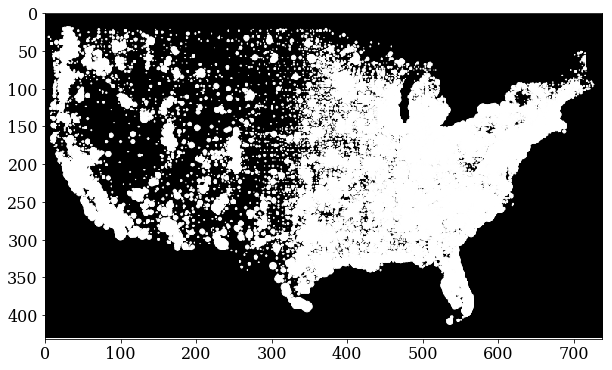

In [39]:
from PIL import Image
img = Image.open('blank.png')
img = np.asarray(img)
imgplot = plt.imshow(img)
imgplot.set_interpolation("nearest")
imgplot = plt.imshow(img)



In [40]:
S_0 = img[:,:,1]
I_0 = np.zeros_like(S_0)
I_0[290,360] = 1 # patient zero

In [41]:
R_0 = np.zeros_like(S_0)

In [43]:

T = 900                         # final time
dt = 1                          # time increment
N = int(T/dt) + 1               # number of time-steps
t = np.linspace(0.0, T, N)      # time discretization

# initialize the array containing the solution for each time-step
u = np.empty((N, 3, S_0.shape[0], S_0.shape[1]))
u[0][0] = S_0
u[0][1] = I_0
u[0][2] = R_0

In [44]:
import matplotlib.cm as cm
theCM = cm.get_cmap("Reds")
theCM._init()
alphas = np.abs(np.linspace(0, 1, theCM.N))
theCM._lut[:-3,-1] = alphas

In [45]:
for n in range(N-1):
    u[n+1] = euler_step(u[n], f, dt)

In [ ]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

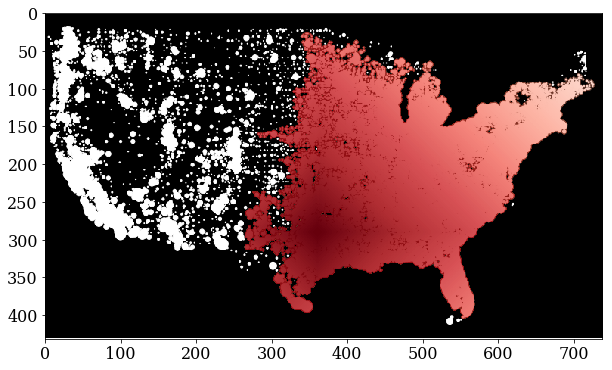

In [46]:
from images2gif import writeGif

keyFrames = []
frames = 60.0

for i in range(0, N-1, int(N/frames)):
    imgplot = plt.imshow(img, vmin=0, vmax=255)
    imgplot.set_interpolation("nearest")
    imgplot = plt.imshow(u[i][1], vmin=0, cmap=theCM)
    imgplot.set_interpolation("nearest")
    filename = "outbreak" + str(i) + ".png"
    plt.savefig(filename)
    keyFrames.append(filename)


In [49]:
keyFrames

['outbreak0.png',
 'outbreak15.png',
 'outbreak30.png',
 'outbreak45.png',
 'outbreak60.png',
 'outbreak75.png',
 'outbreak90.png',
 'outbreak105.png',
 'outbreak120.png',
 'outbreak135.png',
 'outbreak150.png',
 'outbreak165.png',
 'outbreak180.png',
 'outbreak195.png',
 'outbreak210.png',
 'outbreak225.png',
 'outbreak240.png',
 'outbreak255.png',
 'outbreak270.png',
 'outbreak285.png',
 'outbreak300.png',
 'outbreak315.png',
 'outbreak330.png',
 'outbreak345.png',
 'outbreak360.png',
 'outbreak375.png',
 'outbreak390.png',
 'outbreak405.png',
 'outbreak420.png',
 'outbreak435.png',
 'outbreak450.png',
 'outbreak465.png',
 'outbreak480.png',
 'outbreak495.png',
 'outbreak510.png',
 'outbreak525.png',
 'outbreak540.png',
 'outbreak555.png',
 'outbreak570.png',
 'outbreak585.png',
 'outbreak600.png',
 'outbreak615.png',
 'outbreak630.png',
 'outbreak645.png',
 'outbreak660.png',
 'outbreak675.png',
 'outbreak690.png',
 'outbreak705.png',
 'outbreak720.png',
 'outbreak735.png',
 'outbre

In [50]:
images = []

for n in keyFrames:
    frame = Image.open(n)
    images.append(frame)

# Save the frames as an animated GIF
images[0].save('anicircle.gif',
               save_all=True,
               append_images=images[1:],
               duration=100,
               loop=0)